In [1]:
import pandas as pd

data = {
    "post_id": [1, 2, 3, 4, 5],
    "timestamp": [
        "2025-04-01 10:00:00",
        "2025-04-01 11:15:00",
        "2025-04-01 12:30:00",
        "2025-04-01 14:00:00",
        "2025-04-01 15:45:00"
    ],
    "content": [
        "I feel so depressed lately. I don’t know what to do anymore.",
        "Does anyone know where to get addiction help in Austin?",
        "Life is tough but I’m trying to stay strong.",
        "Overwhelmed with work and family issues. I feel lost.",
        "I don’t want to be here anymore. Nothing makes sense."
    ],
    "likes": [15, 8, 20, 5, 2],
    "comments": [3, 5, 10, 4, 1],
    "shares": [1, 0, 3, 0, 0],
    "location": ["", "Austin, TX", "", "", ""]
}

df = pd.DataFrame(data)
df


,post_id,timestamp,content,likes,comments,shares,location
0,1,2025-04-01 10:00:00,I feel so depressed lately. I don’t know what ...,15,3,1,
1,2,2025-04-01 11:15:00,Does anyone know where to get addiction help i...,8,5,0,"Austin, TX"
2,3,2025-04-01 12:30:00,Life is tough but I’m trying to stay strong.,20,10,3,
3,4,2025-04-01 14:00:00,Overwhelmed with work and family issues. I fee...,5,4,0,
4,5,2025-04-01 15:45:00,I don’t want to be here anymore. Nothing makes...,2,1,0,


In [2]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) 
    text = re.sub(r'[^a-z\s]', '', text)  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text
df['cleaned_content'] = df['content'].apply(clean_text)
df[['content', 'cleaned_content']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,cleaned_content
0,I feel so depressed lately. I don’t know what ...,feel depressed lately dont know anymore
1,Does anyone know where to get addiction help i...,anyone know get addiction help austin
2,Life is tough but I’m trying to stay strong.,life tough im trying stay strong
3,Overwhelmed with work and family issues. I fee...,overwhelmed work family issues feel lost
4,I don’t want to be here anymore. Nothing makes...,dont want anymore nothing makes sense


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["content"].apply(lambda text: vader.polarity_scores(text)["compound"])
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df["sentiment"] = df["sentiment_score"].apply(classify_sentiment)
df[["content", "sentiment_score", "sentiment"]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,sentiment_score,sentiment
0,I feel so depressed lately. I don’t know what ...,-0.5563,Negative
1,Does anyone know where to get addiction help i...,0.4019,Positive
2,Life is tough but I’m trying to stay strong.,0.6369,Positive
3,Overwhelmed with work and family issues. I fee...,-0.2732,Negative
4,I don’t want to be here anymore. Nothing makes...,0.0772,Positive


In [4]:
high_risk_keywords = ["don't want to be here", "suicidal", "end it all", "kill myself", "nothing makes sense", "overdose"]
moderate_risk_keywords = ["feel lost", "need help", "struggling", "addiction", "overwhelmed", "can't cope"]
def detect_risk(text):
    text_lower = text.lower()
    for keyword in high_risk_keywords:
        if keyword in text_lower:
            return "High-Risk"
    for keyword in moderate_risk_keywords:
        if keyword in text_lower:
            return "Moderate Concern"
    return "Low Concern"

df["risk_level"] = df["content"].apply(detect_risk)
df[["content", "sentiment", "risk_level"]]


,content,sentiment,risk_level
0,I feel so depressed lately. I don’t know what ...,Negative,Low Concern
1,Does anyone know where to get addiction help i...,Positive,Moderate Concern
2,Life is tough but I’m trying to stay strong.,Positive,Low Concern
3,Overwhelmed with work and family issues. I fee...,Negative,Moderate Concern
4,I don’t want to be here anymore. Nothing makes...,Positive,High-Risk


C:\Users\krish\AppData\Local\Temp\ipykernel_4736\2106731100.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="risk_level", palette="coolwarm")


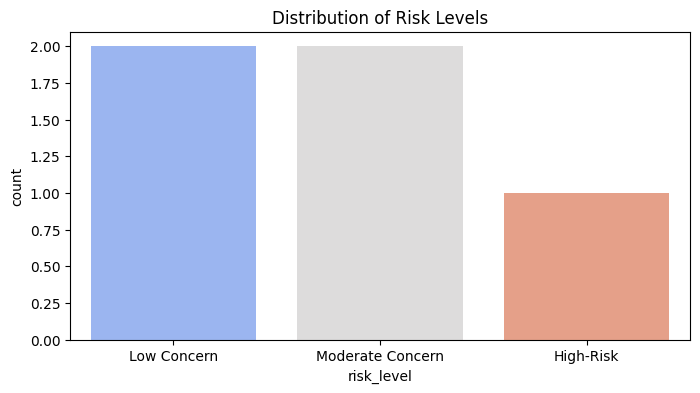

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="risk_level", palette="coolwarm")
plt.title("Distribution of Risk Levels")
plt.show()


In [6]:

cities = ["Austin", "New York", "Los Angeles", "Chicago", "Houston", "Seattle", "Boston"]
def extract_city(text):
    for city in cities:
        if city.lower() in text.lower():
            return city
    return "Unknown"

df["location"] = df["content"].apply(extract_city)
df[["content", "location", "risk_level"]].head()


,content,location,risk_level
0,I feel so depressed lately. I don’t know what ...,Unknown,Low Concern
1,Does anyone know where to get addiction help i...,Austin,Moderate Concern
2,Life is tough but I’m trying to stay strong.,Unknown,Low Concern
3,Overwhelmed with work and family issues. I fee...,Unknown,Moderate Concern
4,I don’t want to be here anymore. Nothing makes...,Unknown,High-Risk


In [7]:
city_coords = {
    "Austin": [30.2672, -97.7431],
    "New York": [40.7128, -74.0060],
    "Los Angeles": [34.0522, -118.2437],
    "Chicago": [41.8781, -87.6298],
    "Houston": [29.7604, -95.3698],
    "Seattle": [47.6062, -122.3321],
    "Boston": [42.3601, -71.0589],
    "Unknown": [37.0902, -95.7129] 
}

df["lat"] = df["location"].apply(lambda x: city_coords[x][0])
df["lon"] = df["location"].apply(lambda x: city_coords[x][1])


In [8]:

!pip install folium


In [9]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

heat_data = df[["lat", "lon"]].values.tolist()
HeatMap(heat_data).add_to(m)

m
